In [8]:
cmd = `ls `

"anim20170810-9726-18h3es2-0\nanim20170810-9726-1f74agc-0\nanim20170810-9726-1kgf47n-0\nanim20170810-9726-742ypl-0\nanim20170810-9726-ohxyfv-0\nanim20170810-9726-szfiq7-0\nfit.log\ngnuplotrb\nMath_Sin_Data\nNewNotebook.ipynb\noctokit.rb\npoints.data\nRuby_Stuff_1.ipynb\nRuby_Stuff_2_PLOT.ipynb\nRuby_Stuff_3_more_Plot.ipynb\nRuby_Stuff_4_Gnuplot.ipynb\nRuby_Stuff_5_GnuplotRB.ipynb\nRuby_Stuff_6_Daru-n-More.ipynb\nSome_Python.ipynb\nsvg20170810-11081-1xwdkbw-0\nsvg20170810-11081-3ngc9r-0\nsvg20170810-5873-15c2pam-0\nsvg20170810-7992-he6aj-0\n"

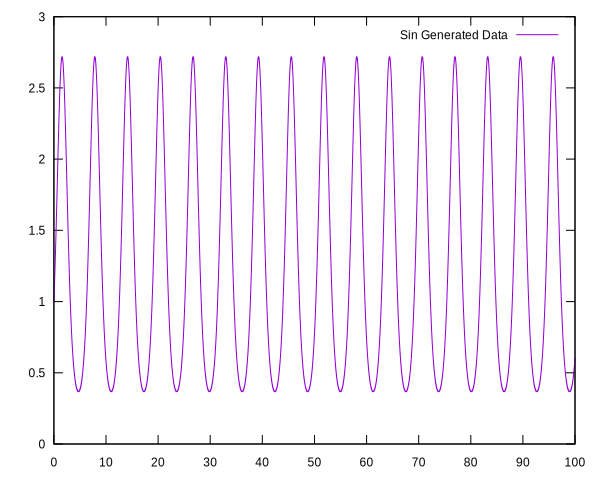

In [12]:
require 'gnuplotrb'
include GnuplotRB

graph = Plot.new(['Math_Sin_Data', title: 'Sin Generated Data', with: 'lines'])

In [14]:
x = (1..600).map { |i| i/100.0 }
y = x.map { |xx| Math.sin(xx ** 2.3) * Math.exp(-xx) }
nil

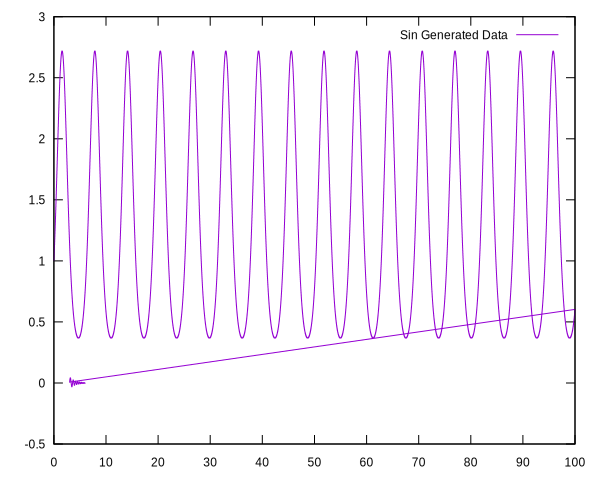

In [15]:
File.open('Math_Sin_Data', 'a') { |f| (301..600).each { |i| f.puts "#{x[i]} #{y[i]}" } }

graph

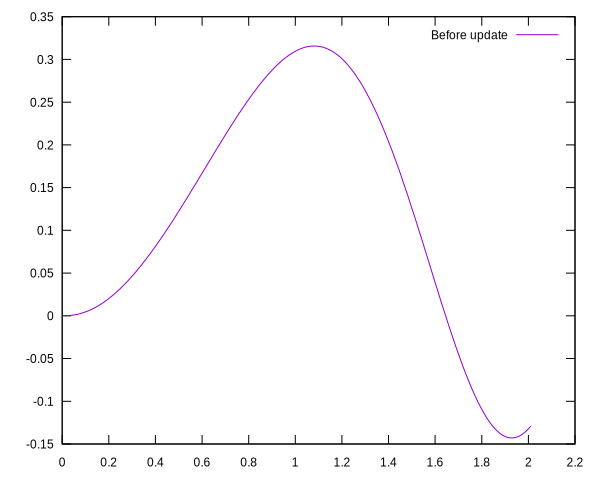

In [16]:
x0 = x[0..200]
y0 = y[0..200]
updatable_plot = Plot.new([[x0,y0], with: 'lines', title: 'Before update'])

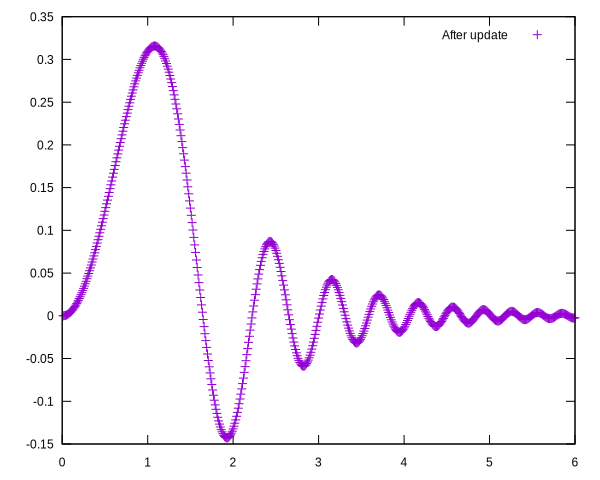

In [17]:
x1 = x[201..600]
y1 = y[201..600]
updatable_plot.update_dataset(data: [x1,y1], title: 'After update')

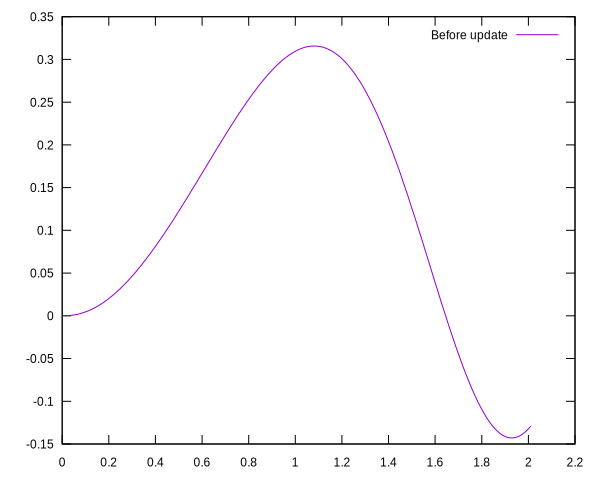

In [18]:
updatable_plot

In [ ]:
Data stored in temporary file and its name is piped to gnuplot

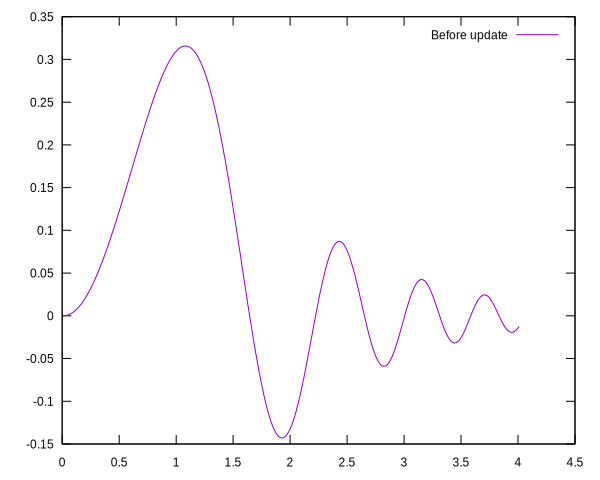

In [19]:
x0 = x[0..400]
y0 = y[0..400]
updatable_file_plot = Plot.new([[x0,y0], with: 'lines', title: 'Before update', file: true])

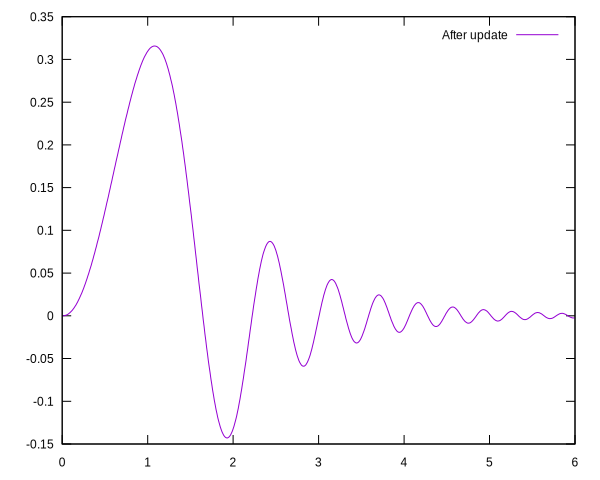

In [20]:
x1 = x[401..600]
y1 = y[401..600]
updatable_file_plot.update_dataset(data: [x1,y1], title: 'After update')

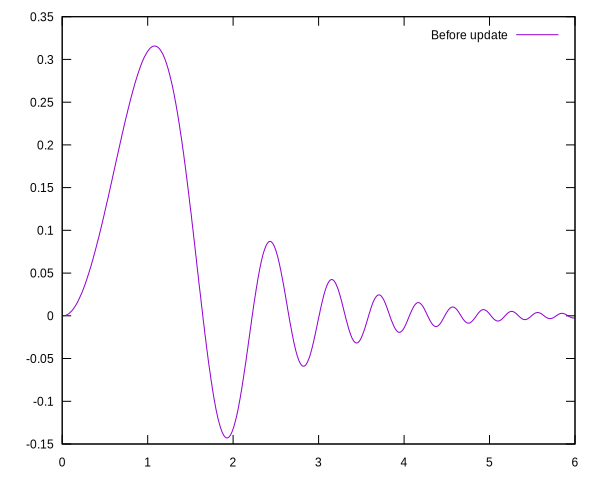

In [21]:
updatable_file_plot

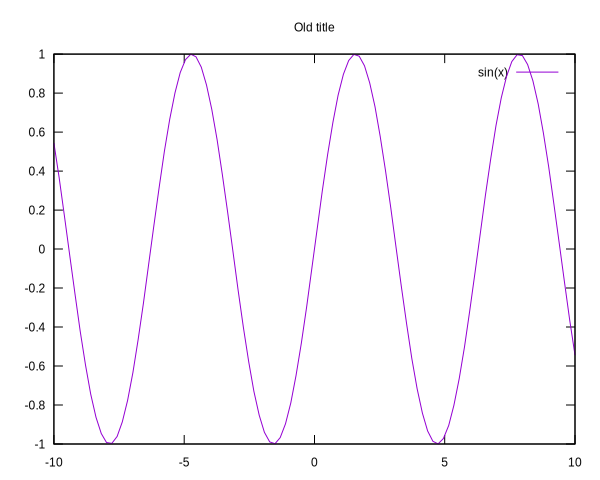

In [22]:
plot = Plot.new('sin(x)', title: 'Old title')

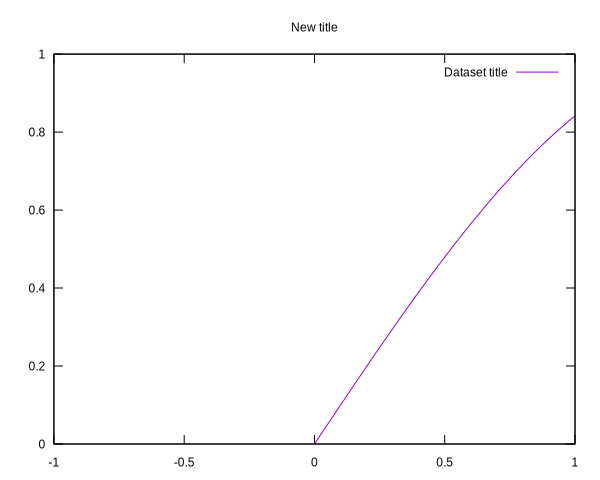

In [23]:
plot.title = 'New title'
# plot is container of datasets, so plot[0] is Dataset object
plot[0].title = 'Dataset title'
plot.xrange!(-1..1)
plot.yrange = 0..1
plot

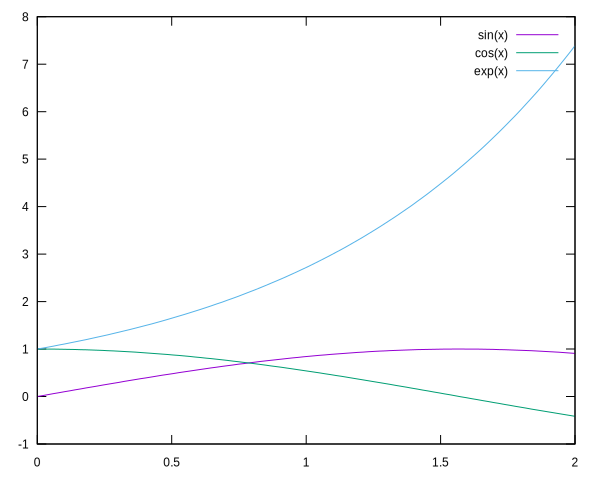

In [24]:
plot = Plot.new('sin(x)', 'cos(x)', 'exp(x)', xrange: 0..2)

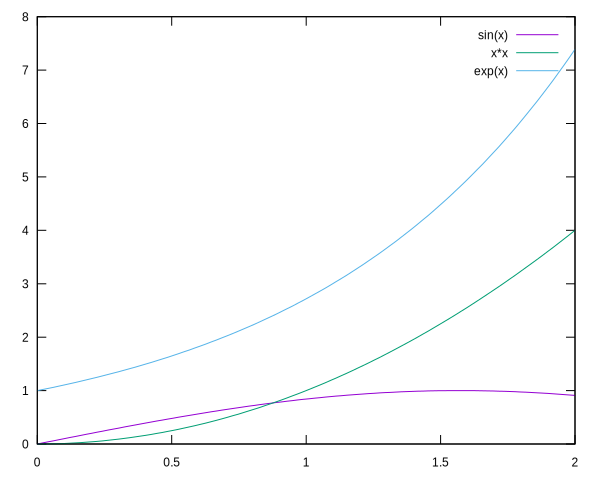

In [25]:
plot.replace_dataset(1, 'x*x') # DOES NOT modify original plot

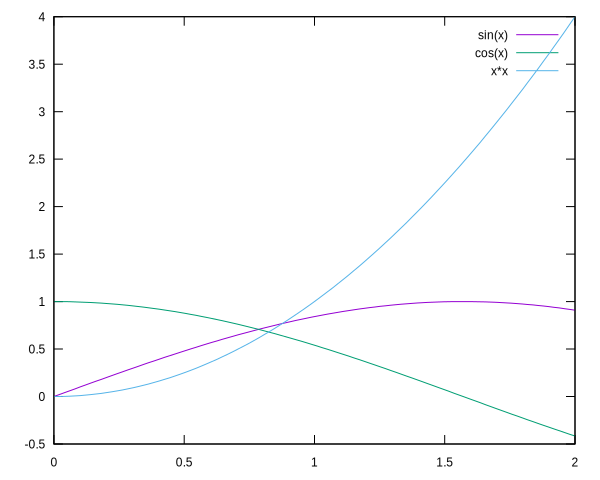

In [26]:
plot.replace_dataset!(2, 'x*x') # MODIFYES original plot

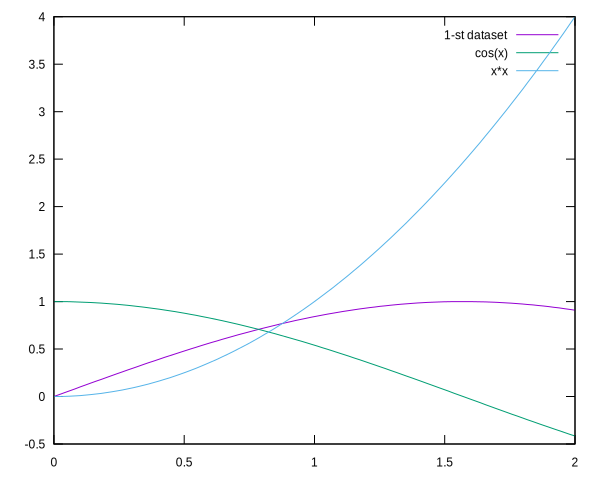

In [27]:
plot.update_dataset!(0, title: '1-st dataset')

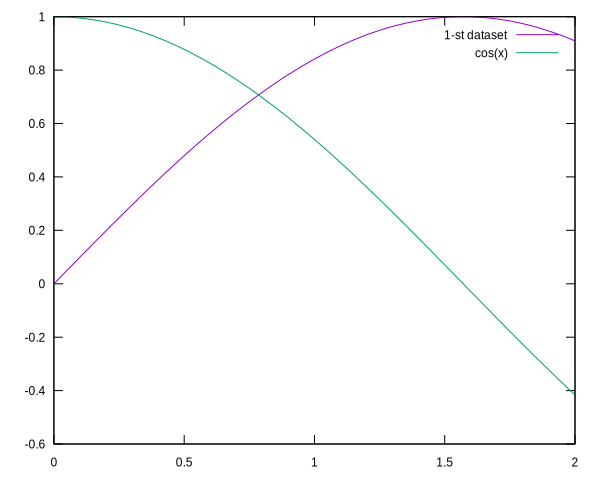

In [28]:
plot.remove_dataset!(2)

In [5]:
require 'tk'
require 'tkextlib/tile'
 
root = TkRoot.new title: "Quick Sketch"
 
f1,f2,f3 = 3.times.map{ TkFrame.new.pack fill: :x }
 
colors = ["red","orange","yellow","lawn green","green","cyan","blue","purple","white","gray","black"]
cvariable = TkVariable.new( colors[0] )
 
# Pick colors
colors.each do |c|
  TkRadioButton.new(f2){
    text "â– "
    variable cvariable
    value c
    indicatoron 0
    fg c
    activeforeground c
    pack side: :left
  }
end
 
# overlay -single
bvariable = TkVariable.new(1)
checkbutton = TkCheckButton.new(f2) {
  text "Single"
  select
  variable bvariable
  onvalue 1
  offvalue 0
  pack side: :left
}
 
# Scale
scale = Tk::Tile::Scale.new(f2){
  orient :horizontal
  from 2;  to 20;  set 10
  pack(side: :right)
}
 
# Class name
class MyNotebook < Tk::Tile::Notebook
 
  def initialize(args)
    super args
    @counter = 0
    add_canvas
  end
 
  def set_widgets(cv, scale, bv)
    @scale = scale
    @cv = cv
    @bv = bv
  end
 
  def add_canvas
    f = Tk::Tile::Frame.new(self)
    canvas = TkCanvas.new(f){
      width 400
      height 400
      bg :white
      pack
    }
    canvas.bind "B1-Motion", proc { |x, y|
      size = @scale.get
      color = @cv.value
      border = @bv.value
      TkcOval.new(canvas, x-size, y-size, x+size, y+size){
        fill color 
        width border
        # bind "B3-Motion", proc{self.destroy} 
        bind "Shift-Enter", proc{self.destroy}
      }
    }, "%x %y"
    self.add f, text: "%02d"%@counter
    @counter += 1
  end
 
  def remove_canvas
    puts self.forget :current
  end
 
end
 
notebook = MyNotebook.new(f3).pack
notebook.set_widgets cvariable, scale, bvariable
 
# Control Key 
root.bind "Control-Key-t" do
  notebook.add_canvas 
end
 
# Control key Delete
root.bind "Control-Key-Delete" do
  notebook.remove_canvas
end
 
Tk.mainloop

RuntimeError: can't invoke "wm" command: application has been destroyed

In [7]:
reset() -f

NoMethodError: undefined method `reset' for main:Object